## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. load Cleaned Dataset

In [3]:
cdc = pd.read_csv("C:/Users/mmaha/projects/cdc-overdose-prediction/data/CDC_Overdose_Cleaned.csv")

In [4]:
print("Rows:", cdc.shape[0])
print("Columns:", cdc.shape[1])
cdc.head()

Rows: 6971
Columns: 11


,notes,state,state_code,county,county_code,year,year_code,deaths,population,crude_rate,death_rate_per_100k
0,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2018.0,2018.0,28.0,218022.0,12.8,12.842741
1,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2019.0,2019.0,27.0,223234.0,12.1,12.094932
2,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2020.0,2020.0,63.0,229287.0,27.5,27.476481
3,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2021.0,2021.0,88.0,239294.0,36.8,36.774846
4,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2022.0,2022.0,75.0,246435.0,30.4,30.433989


### 2. Quick Data Overview

In [5]:
print("\nBasic info:")
cdc.info()


Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6971 entries, 0 to 6970
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   notes                0 non-null      float64
 1   state                6971 non-null   object 
 2   state_code           6971 non-null   float64
 3   county               6971 non-null   object 
 4   county_code          6971 non-null   float64
 5   year                 6971 non-null   float64
 6   year_code            6971 non-null   float64
 7   deaths               6971 non-null   float64
 8   population           6971 non-null   float64
 9   crude_rate           4499 non-null   float64
 10  death_rate_per_100k  6971 non-null   float64
dtypes: float64(9), object(2)
memory usage: 599.2+ KB


In [6]:
print("\nMissing values:")
print(cdc.isna().sum())


Missing values:
notes                  6971
state                     0
state_code                0
county                    0
county_code               0
year                      0
year_code                 0
deaths                    0
population                0
crude_rate             2472
death_rate_per_100k       0
dtype: int64


In [7]:
print("\nNumeric summary:")
print(cdc.describe().T)


Numeric summary:
                      count           mean            std          min  \
notes                   0.0            NaN            NaN          NaN   
state_code           6971.0      31.082341      15.263100     1.000000   
county_code          6971.0   31175.041457   15281.095013  1003.000000   
year                 6971.0    2020.680103       1.674547  2018.000000   
year_code            6971.0    2020.680103       1.674547  2018.000000   
deaths               6971.0      73.672070     144.791810    10.000000   
population           6971.0  252063.789700  514524.041052  4197.000000   
crude_rate           4499.0      36.334274      21.843771     3.900000   
death_rate_per_100k  6971.0      34.827677      21.463062     3.774404   

                              25%            50%           75%           max  
notes                         NaN            NaN           NaN           NaN  
state_code              18.000000      35.000000      44.00000  5.600000e+01  
coun

### 3. Findings

### 3.1. Average Death Rate by Year (2018 - 2023)

**Interpretation:** Overdose deaths increased rapidly from 2019 - 2021 and slightly declined until 2023.

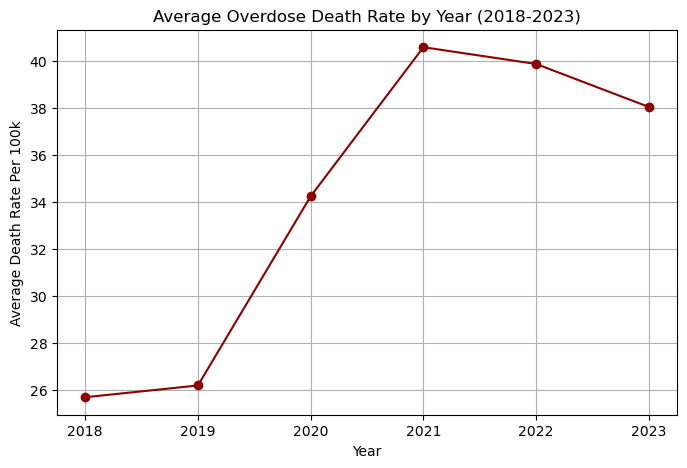

In [8]:
# Overdose Trend Over Times
plt.figure(figsize=(8,5))
cdc.groupby("year")["death_rate_per_100k"].mean().plot(marker='o', color='darkred')
plt.title("Average Overdose Death Rate by Year (2018-2023)")
plt.xlabel("Year")
plt.ylabel("Average Death Rate Per 100k")
plt.grid(True)
plt.show()

### 3.2.  Top 10 States by Average Death Rate

**Interpretation:** Between 2018 - 2023, West Virginia had the highest overdose rate followed by Kentucy and District of Columbia.

C:\Users\mmaha\AppData\Local\Temp\ipykernel_18940\2682293598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="Reds_r")


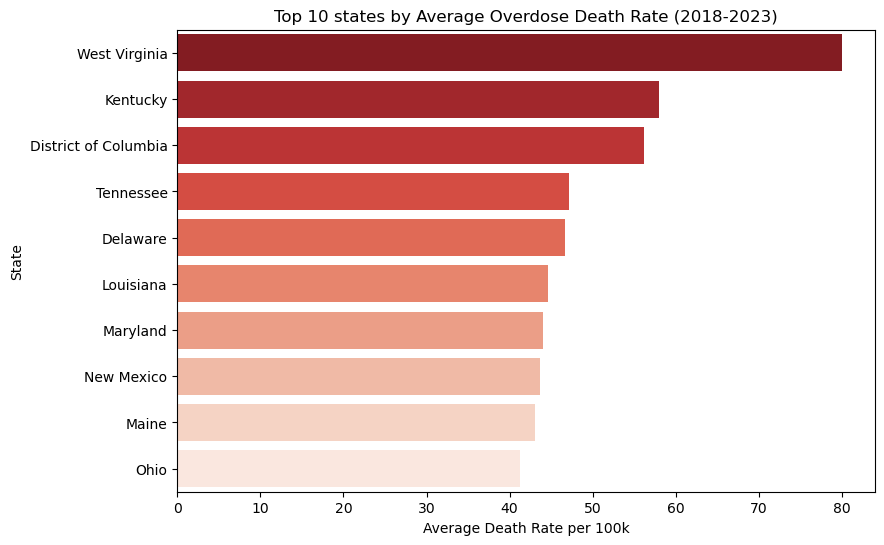

In [9]:
plt.figure(figsize=(9,6))

top_states = (
    cdc.groupby("state")["death_rate_per_100k"]
    .mean()
    .nlargest(10)
)
sns.barplot(x=top_states.values, y=top_states.index, palette="Reds_r")
plt.title("Top 10 states by Average Overdose Death Rate (2018-2023)")
plt.xlabel("Average Death Rate per 100k")
plt.ylabel("State")
plt.show()

### 3.3. Yearly Trend for Selected States

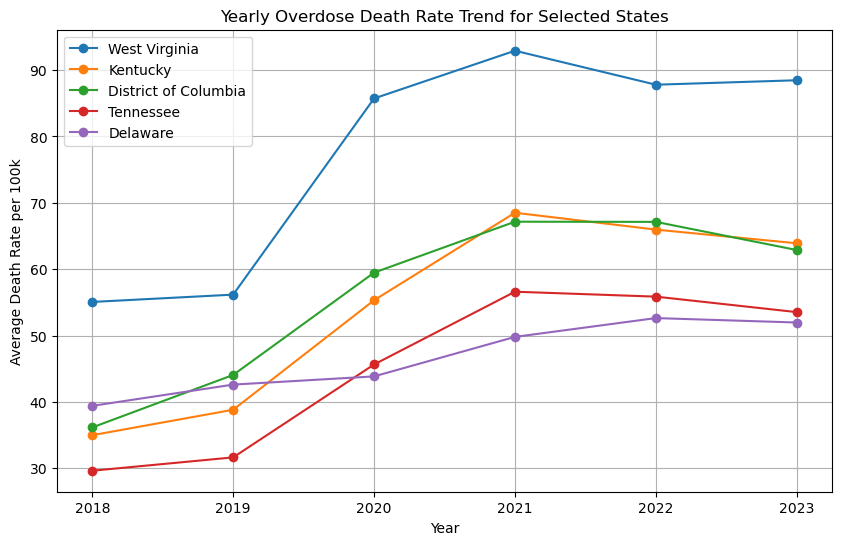

In [10]:

selected_states = ["West Virginia", "Kentucky", "District of Columbia", "Tennessee", "Delaware", ]
plt.figure(figsize=(10,6))
for s in selected_states:
    state_data = cdc[cdc["state"] == s]
    yearly_mean = state_data.groupby("year")["death_rate_per_100k"].mean()
    plt.plot(yearly_mean.index, yearly_mean.values, marker="o", label=s)

plt.title("Yearly Overdose Death Rate Trend for Selected States")
plt.xlabel("Year")
plt.ylabel("Average Death Rate per 100k")
plt.legend()
plt.grid(True)
plt.show()    

### 3.4. Distribution of County-Level Rates

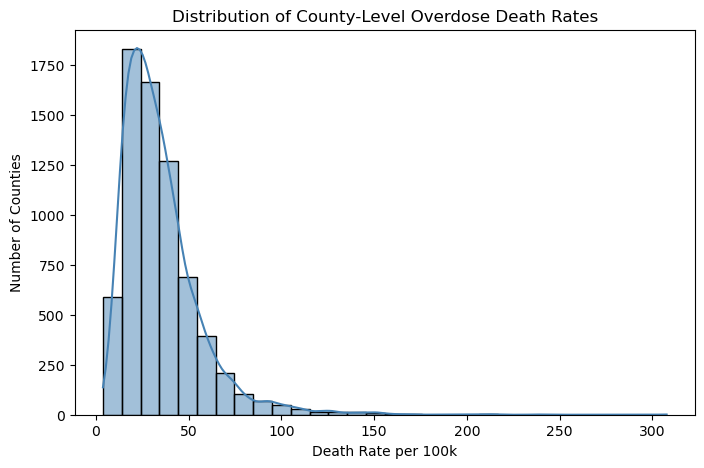

In [11]:

plt.figure(figsize=(8,5))
sns.histplot(cdc["death_rate_per_100k"], bins=30, kde=True, color='steelblue')
plt.title("Distribution of County-Level Overdose Death Rates")
plt.xlabel("Death Rate per 100k")
plt.ylabel("Number of Counties")
plt.show()

### 3.5. Correlation Heatmap

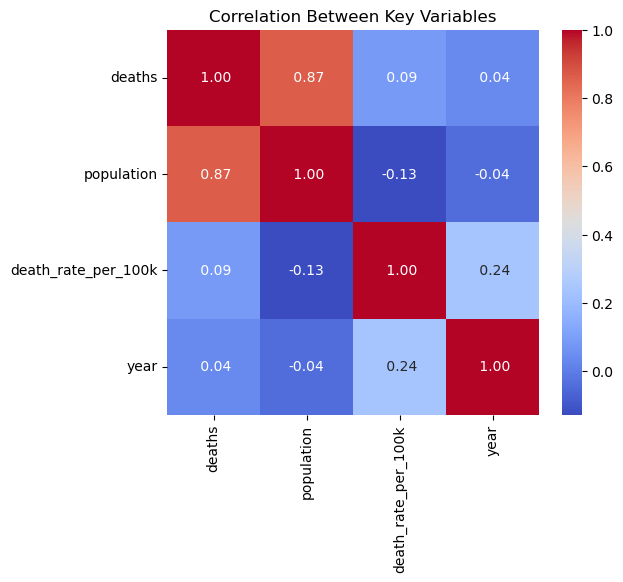

In [12]:
numeric_cols = ["deaths", "population", "death_rate_per_100k", "year"]
corr = cdc[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt =" .2f")
plt.title("Correlation Between Key Variables")
plt.show()
